In [3]:
import networkx as nx
import numpy as np
import os
from glob import glob
from shutil import copy
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import seaborn as sns


# Grid roadmap generation

60.0, 60.0
60.0, 100.0
60.0, 140.0
60.0, 180.0
60.0, 220.0
60.0, 260.0
60.0, 300.0
60.0, 340.0
60.0, 380.0
60.0, 420.0
100.0, 60.0
100.0, 100.0
100.0, 140.0
100.0, 180.0
100.0, 220.0
100.0, 260.0
100.0, 300.0
100.0, 340.0
100.0, 380.0
100.0, 420.0
140.0, 60.0
140.0, 100.0
140.0, 140.0
140.0, 180.0
140.0, 220.0
140.0, 260.0
140.0, 300.0
140.0, 340.0
140.0, 380.0
140.0, 420.0
180.0, 60.0
180.0, 100.0
180.0, 140.0
180.0, 180.0
180.0, 220.0
180.0, 260.0
180.0, 300.0
180.0, 340.0
180.0, 380.0
180.0, 420.0
220.0, 60.0
220.0, 100.0
220.0, 140.0
220.0, 180.0
220.0, 220.0
220.0, 260.0
220.0, 300.0
220.0, 340.0
220.0, 380.0
220.0, 420.0
260.0, 60.0
260.0, 100.0
260.0, 140.0
260.0, 180.0
260.0, 220.0
260.0, 260.0
260.0, 300.0
260.0, 340.0
260.0, 380.0
260.0, 420.0
300.0, 60.0
300.0, 100.0
300.0, 140.0
300.0, 180.0
300.0, 220.0
300.0, 260.0
300.0, 300.0
300.0, 340.0
300.0, 380.0
300.0, 420.0
340.0, 60.0
340.0, 100.0
340.0, 140.0
340.0, 180.0
340.0, 220.0
340.0, 260.0
340.0, 300.0
340.0, 340.0
340.

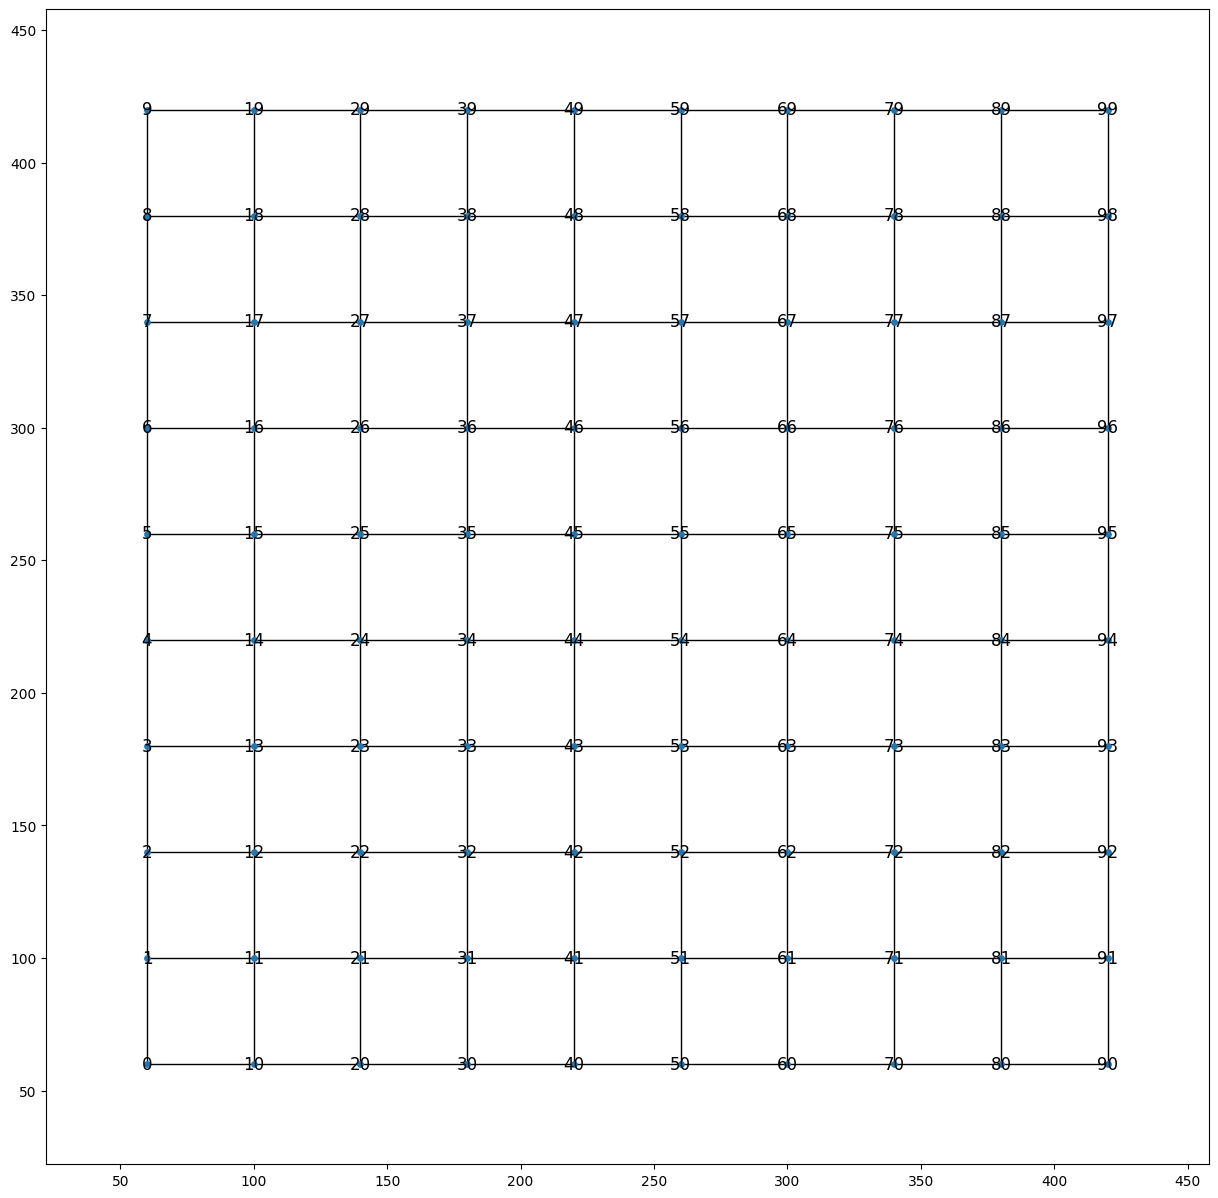

In [96]:
num_x = 10
num_y = 10
x_size = 400
y_size = 400

# shifting the grid
x_shift = 60
y_shift = 60

x_space = x_size + x_shift
y_space = y_size + y_shift

vertices = {}
plot_pos = {}
neighbor_list = [[] for i in range(0,num_x*num_y)]
edges_in_coord = []
edges = []

v_idx = 0
for x in range(0,num_x):
    x_coord = x * x_size/num_x + x_shift
    for y in range(0, num_y):
        y_coord = y * y_size/num_y + y_shift
        print(str(x_coord) + ", " + str(y_coord))
        if(x_coord<x_space and y_coord<y_space):
            vertices[(x_coord,y_coord)] = v_idx
            plot_pos[v_idx] = (x_coord,y_coord)
            if((y_coord+y_size/num_y) < y_space):
                edges_in_coord.append(((x_coord, y_coord),(x_coord, y_coord+y_size/num_y)))
            if((x_coord+x_size/num_x) < x_space):
                edges_in_coord.append(((x_coord, y_coord),(x_coord+x_size/num_x, y_coord)))
        v_idx+=1

for e_c in edges_in_coord:
    edges.append((vertices[e_c[0]], vertices[e_c[1]]))


G = nx.Graph()

for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1])

# pos = {i: p for i,p in enumerate(vertices)}
# print(pos)

fig, ax = plt.subplots(figsize=(15,15))

nx.draw(G, pos=plot_pos,node_size=15, ax=ax, with_labels = True)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

# save the grid map to a file.

folder_path = "./toio_map_examples"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

content = []
content.append('{},{},{},{}'.format(x_space, y_space, len(vertices), len(edges)))

for v in vertices.items():
    content.append('{},{},{}'.format(v[1],v[0][0],v[0][1]))

for e in edges:
    content.append('{},{}'.format(e[0],e[1]))

# print(content)

write_to = folder_path+"/grid_map_{}_{}_{}.txt".format(x_space,y_space,len(vertices))
f = open(write_to, 'w')
for c in content:
    f.write(c+"\n")
f.close()


# Generate random agent starts and goals

In [59]:
# generate random agent files

num_instance_to_generate = 1
num_agents = 6

for i in range(0,num_instance_to_generate):

    random_loc = np.random.choice(list(vertices.values()), num_agents * 2, replace=False)
    start_loc = random_loc[0:num_agents]
    goal_loc = random_loc[num_agents:]
    print(start_loc, goal_loc)

    content = []
    content.append('{}\n'.format(num_agents))

    for a in range(0,num_agents):
        content.append('{},{},{}\n'.format(a, start_loc[a], goal_loc[a]))

    # print(content)

    write_to = folder_path+"/grid_agent_{}_{}_{}_{}_{}.txt".format(x_space,y_space, len(vertices),num_agents, i)
    f = open(write_to, 'w')
    for c in content:
        f.write(c)
    f.close()


[47 12 53 34 24 46] [41  2 52 88 48 76]


# Generate an agent file for swarm shape changing

In [76]:

num_instance_to_generate = 1
num_agents = 6

for i in range(0,num_instance_to_generate):

    start_loc = range(1,11)
    goal_loc = [35,18,53,67,39,
                89]    # index of locations on the map.
    # print(start_loc, goal_loc)

    content = []
    content.append('{}\n'.format(num_agents))

    for a in range(0,num_agents):
        content.append('{},{},{}\n'.format(a, start_loc[a], goal_loc[a]))

    # print(content)

    write_to = folder_path+"/grid_agent_shape_example_{}_{}_{}_{}_{}.txt".format(x_space,y_space, len(vertices),num_agents, i)
    f = open(write_to, 'w')
    for c in content:
        f.write(c)
    f.close()

# Run the c++ solver on agent and map files.

In [77]:
import subprocess

# Enter the location of the compiled C++ executable.
program = "./general_planner"

# Enter the path to the map and agent files.
map_file = "./toio_map_examples/grid_map_400_400_81.txt"
agent_file = "./toio_map_examples/grid_agent_shape_example_400_400_81_6_0.txt"

# Enter where you want to output the path file.
path_file = "./output_path.txt"

cpp_out = subprocess.run(program + " " + map_file + " " + agent_file + " 10 " + path_file, capture_output=True,shell=True)
print(cpp_out.stdout.decode())
print(cpp_out.stderr.decode())


precomputing for agent 0
expanded nodes: 80
precomputing for agent 1
expanded nodes: 80
precomputing for agent 2
expanded nodes: 80
precomputing for agent 3
expanded nodes: 80
precomputing for agent 4
expanded nodes: 81
precomputing for agent 5
expanded nodes: 80
finding the inital path for agent 0
finding the inital path for agent 1
finding the inital path for agent 2
finding the inital path for agent 3
finding the inital path for agent 4
Agent 4 has no valid path from its start to its goal
No solution.




# Load generated map and paths for visulization.

Put the map file path in "map_file" and the agent file path in "agent_file"

In [41]:

x_space = 0
y_space = 0
num_vertices = 0
num_edges = 0

# shifting the grid
x_shift = 50
y_shift = 50

vertices = {}
plot_pos = {}
neighbor_list = [[] for i in range(0,num_x*num_y)]
edges_in_coord = []
edges = []

with open(map_file, 'r') as f:
    lines = f.readlines()
    # print(lines[0].strip().split(","))
    for l_id, l in enumerate(lines):
        l_data = l.strip().split(",")
        # print(l_data)
        if(l_id == 0):
            x_space = int(l_data[0])
            y_space = int(l_data[1])
            num_vertices = int(l_data[2])
            num_edges = int(l_data[3])
        elif(l_id >0 and l_id <= num_vertices):
            v_id = int(l_data[0])
            x_coord = float(l_data[1])
            y_coord = float(l_data[2])
            vertices[(x_coord, y_coord)] = v_id
            plot_pos[v_id] = (x_coord,y_coord)
        elif(l_id > num_vertices):
            edges.append((int(l_data[0]), int(l_data[1])))

# load start and goal locations

agent_starts = []
agent_goals = []

with open(agent_file, 'r') as f:
    lines = f.readlines()
    for l in lines[1:]:
        l_data = l.strip("\n").split(",")
        # print(l_data)
        agent_starts.append(int(l_data[1]))
        agent_goals.append(int(l_data[2]))



# Visualize the movements.

Put the path to the file of paths in "path_file"

{(20.0, 20.0): 0, (20.0, 60.0): 1, (20.0, 100.0): 2, (20.0, 140.0): 3, (20.0, 180.0): 4, (20.0, 220.0): 5, (20.0, 260.0): 6, (20.0, 300.0): 7, (20.0, 340.0): 8, (20.0, 380.0): 9, (60.0, 20.0): 10, (60.0, 60.0): 11, (60.0, 100.0): 12, (60.0, 140.0): 13, (60.0, 180.0): 14, (60.0, 220.0): 15, (60.0, 260.0): 16, (60.0, 300.0): 17, (60.0, 340.0): 18, (60.0, 380.0): 19, (100.0, 20.0): 20, (100.0, 60.0): 21, (100.0, 100.0): 22, (100.0, 140.0): 23, (100.0, 180.0): 24, (100.0, 220.0): 25, (100.0, 260.0): 26, (100.0, 300.0): 27, (100.0, 340.0): 28, (100.0, 380.0): 29, (140.0, 20.0): 30, (140.0, 60.0): 31, (140.0, 100.0): 32, (140.0, 140.0): 33, (140.0, 180.0): 34, (140.0, 220.0): 35, (140.0, 260.0): 36, (140.0, 300.0): 37, (140.0, 340.0): 38, (140.0, 380.0): 39, (180.0, 20.0): 40, (180.0, 60.0): 41, (180.0, 100.0): 42, (180.0, 140.0): 43, (180.0, 180.0): 44, (180.0, 220.0): 45, (180.0, 260.0): 46, (180.0, 300.0): 47, (180.0, 340.0): 48, (180.0, 380.0): 49, (220.0, 20.0): 50, (220.0, 60.0): 51, (

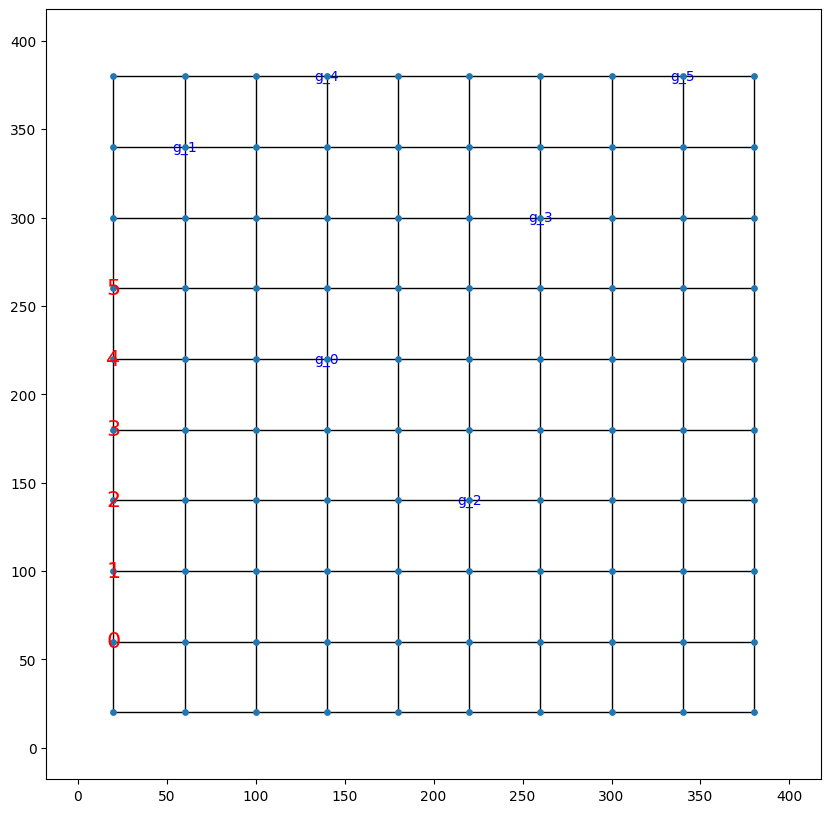

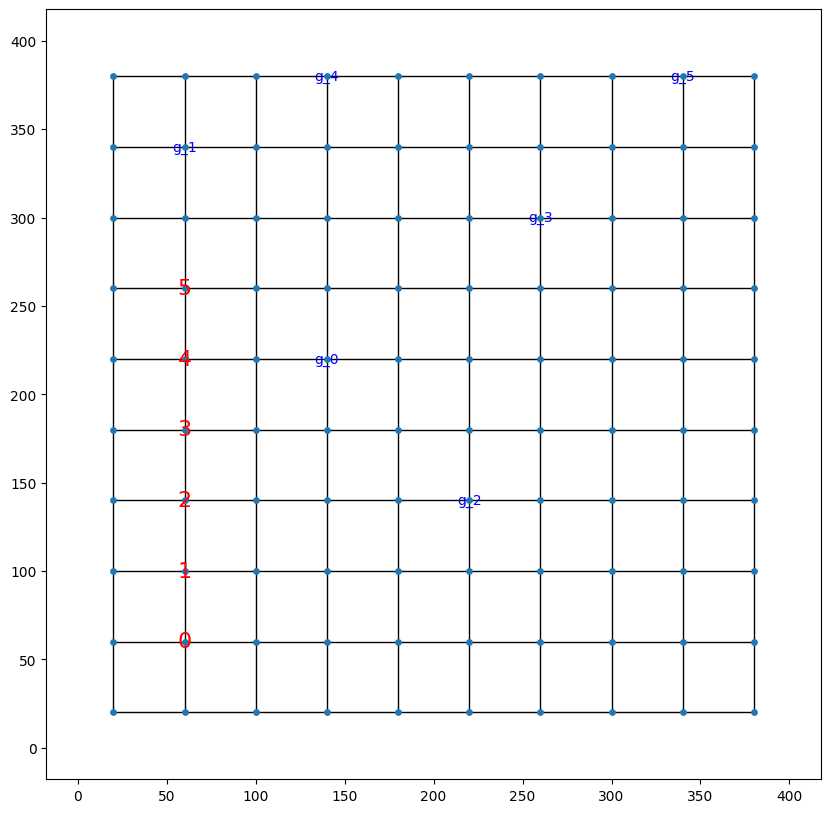

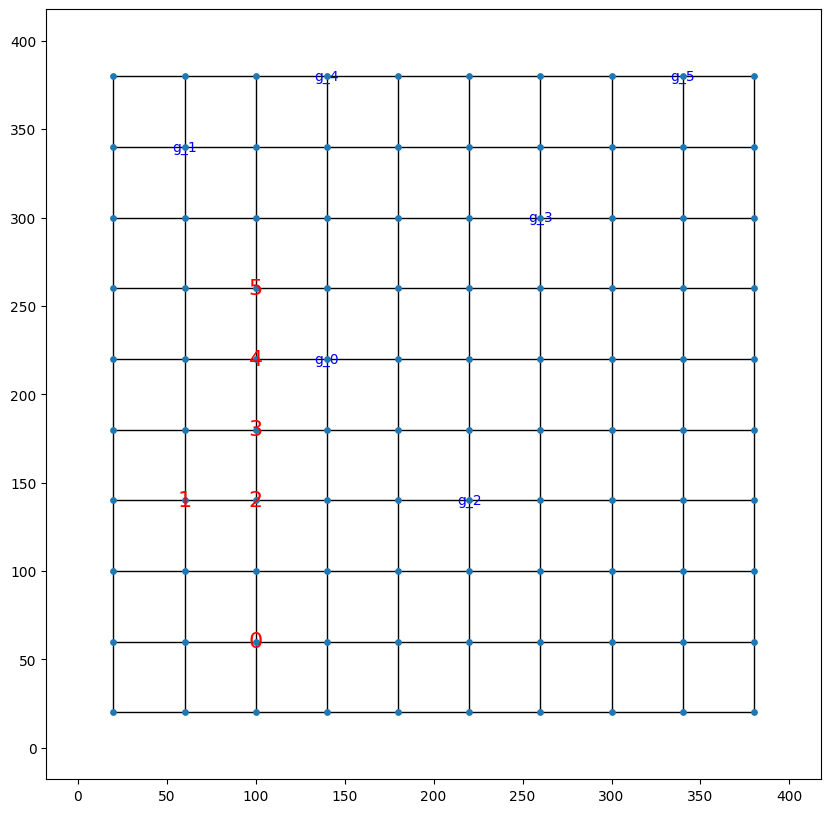

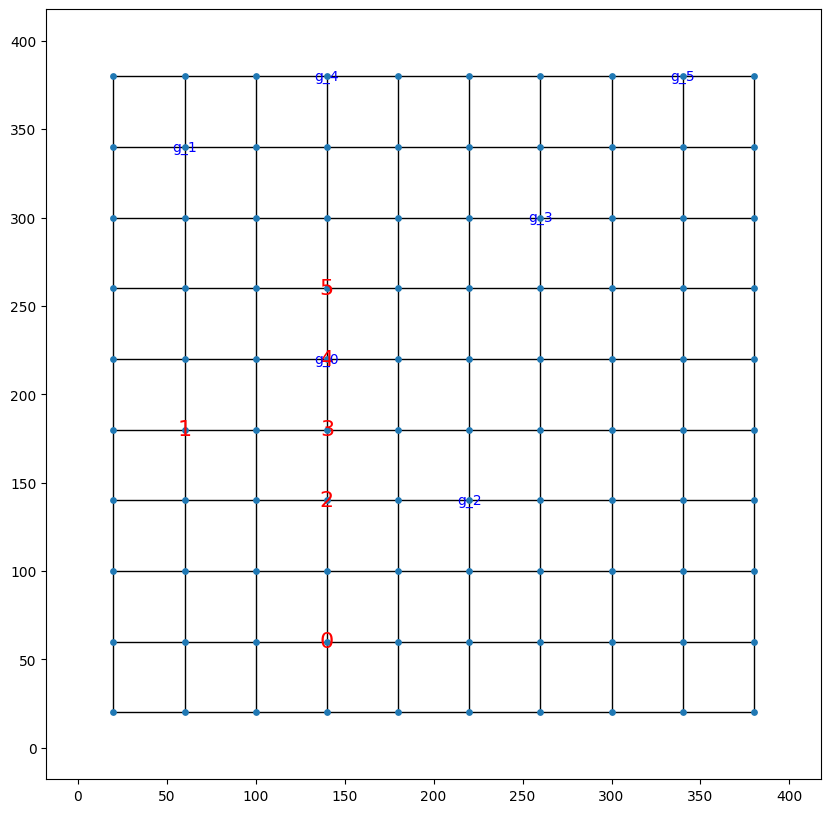

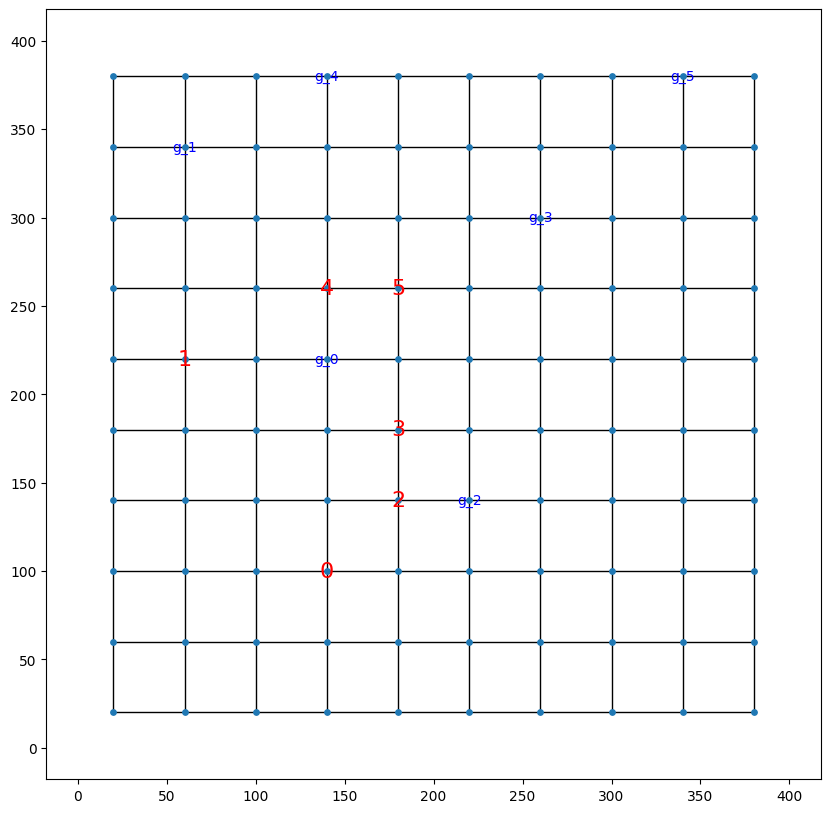

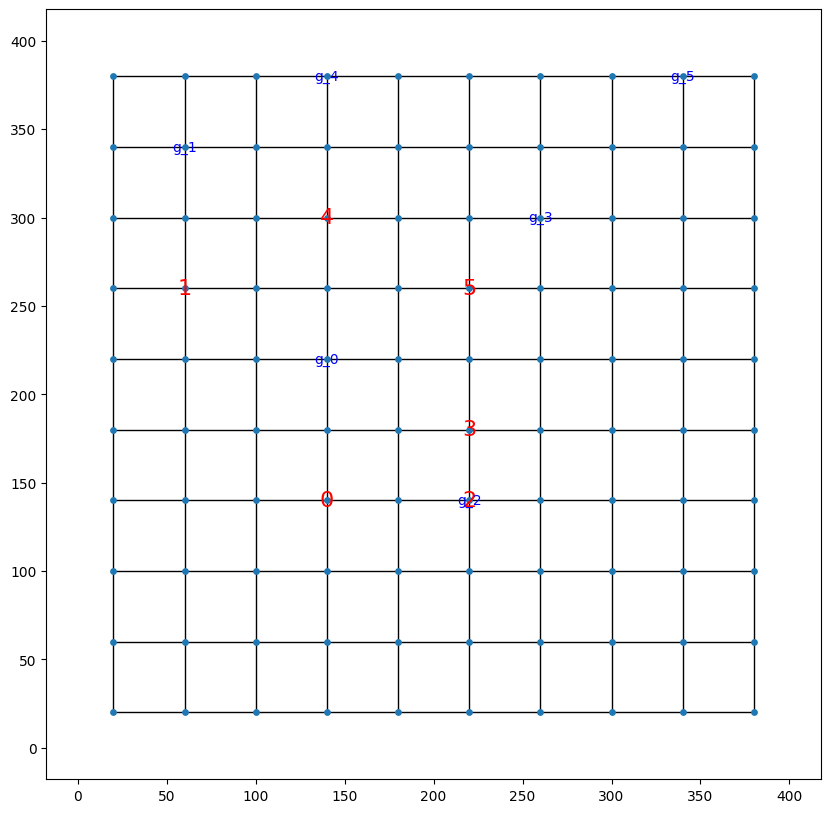

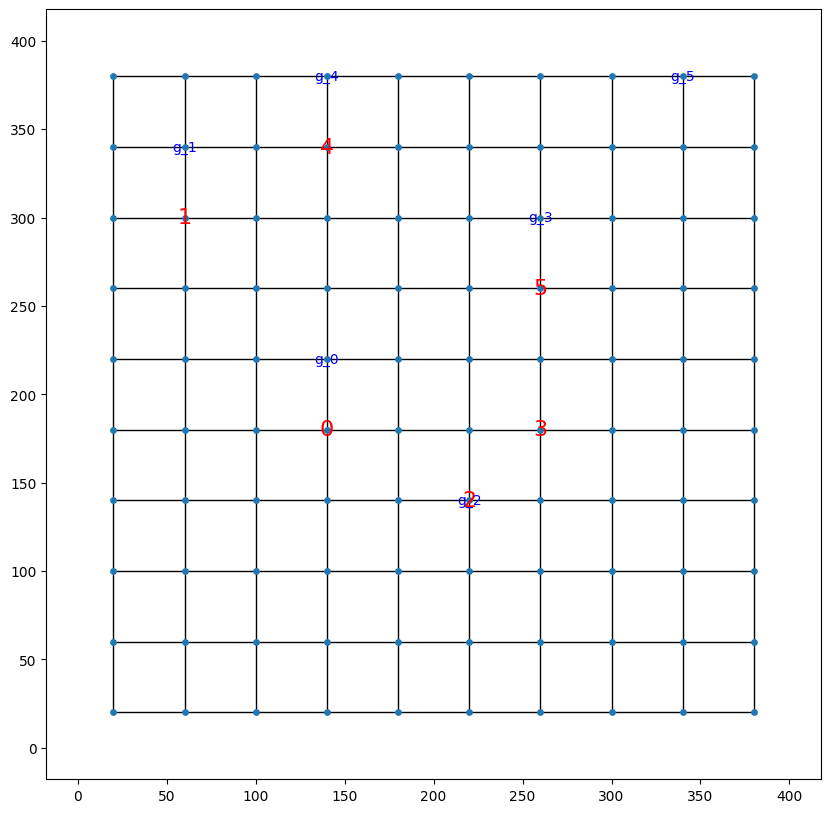

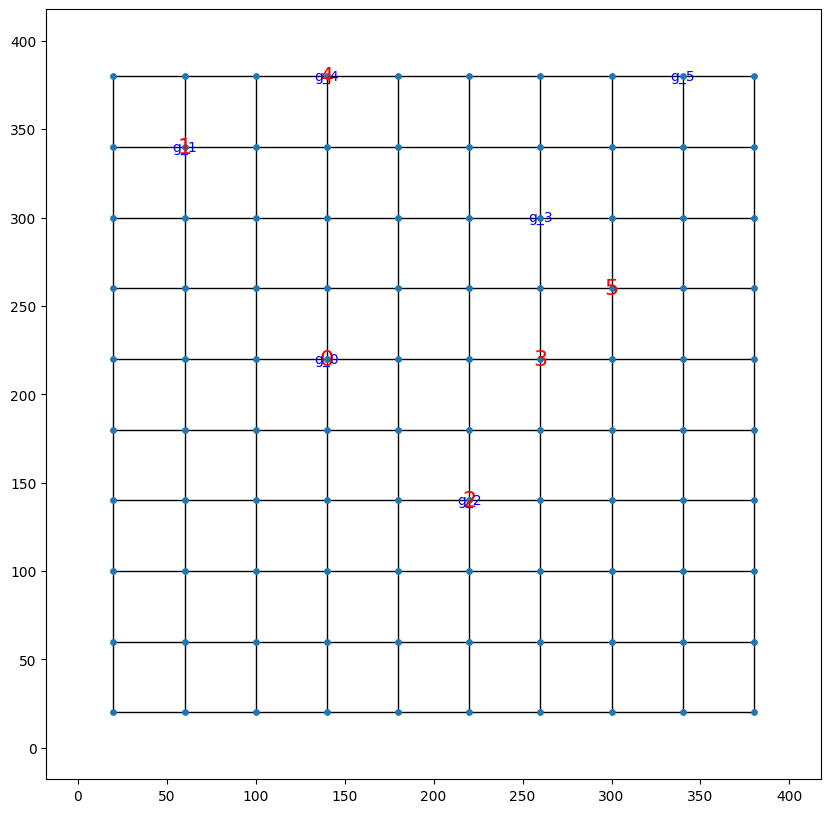

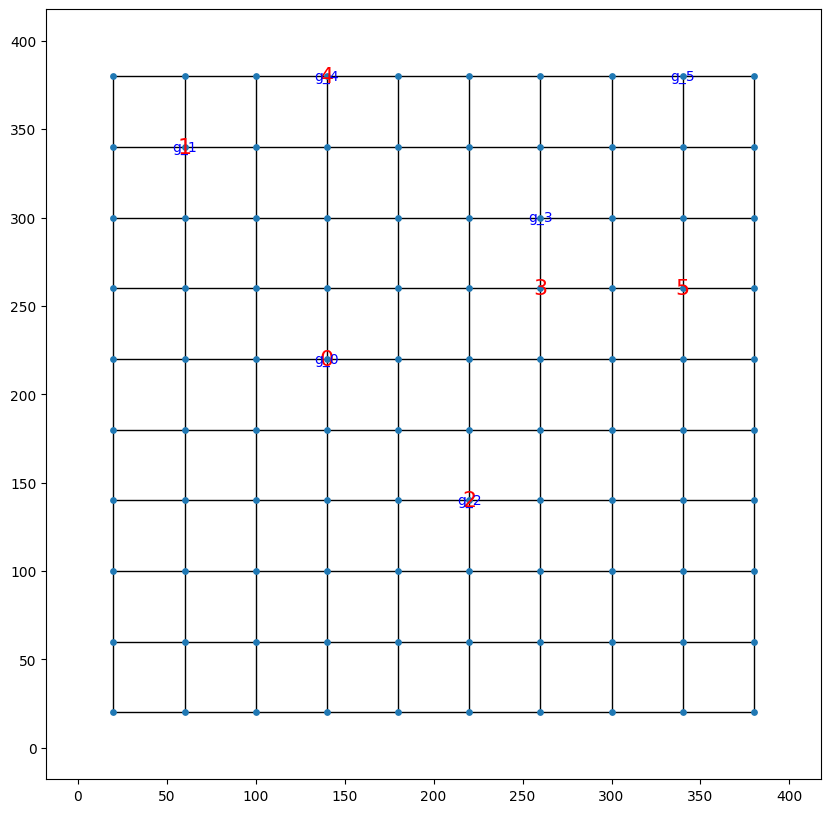

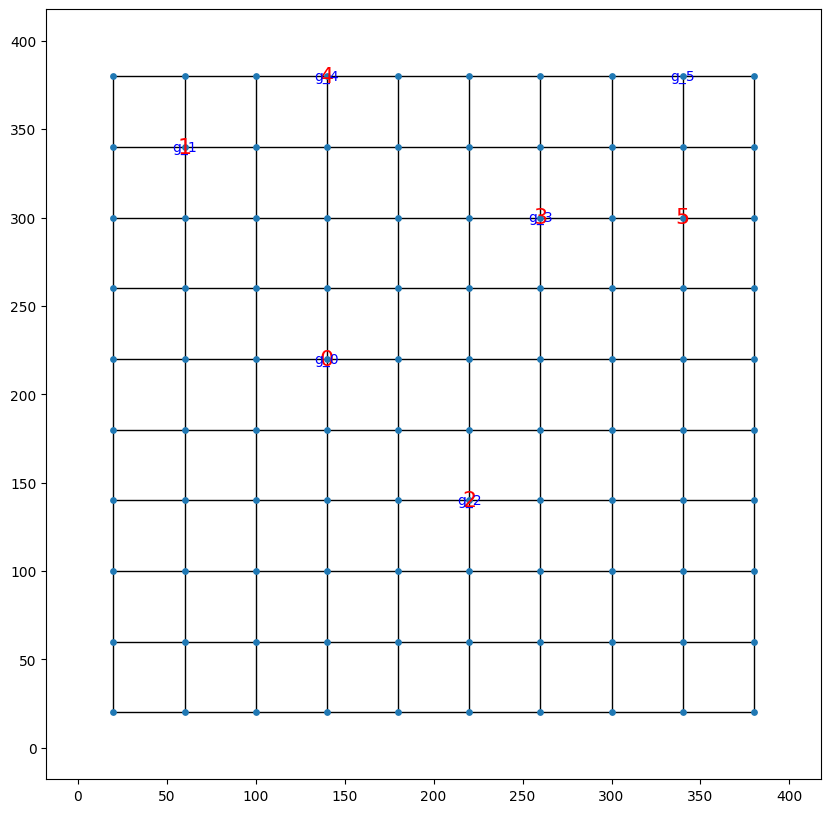

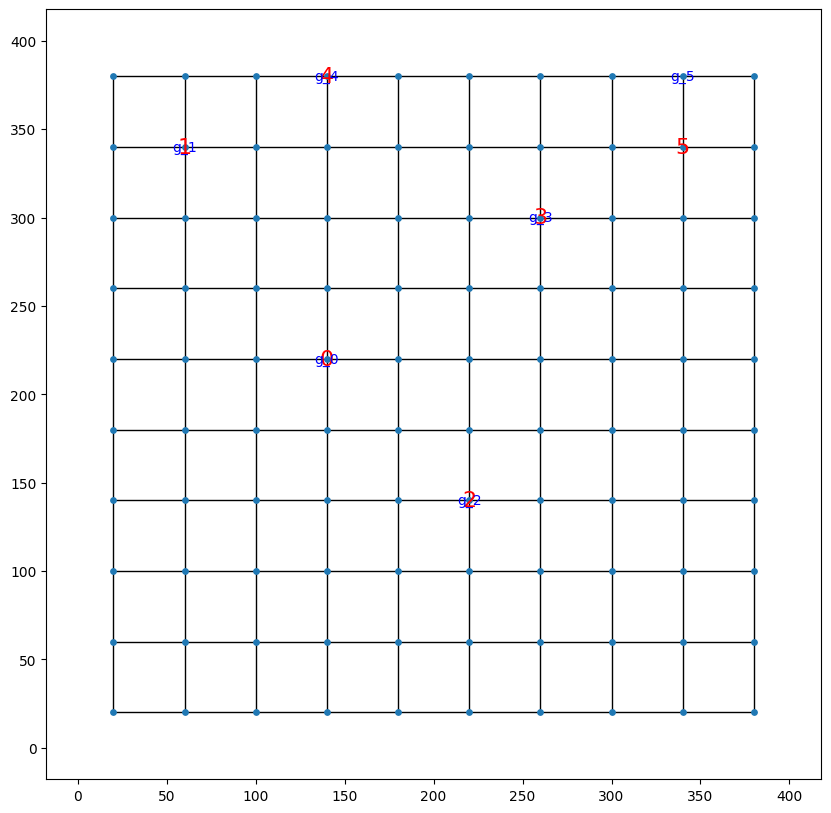

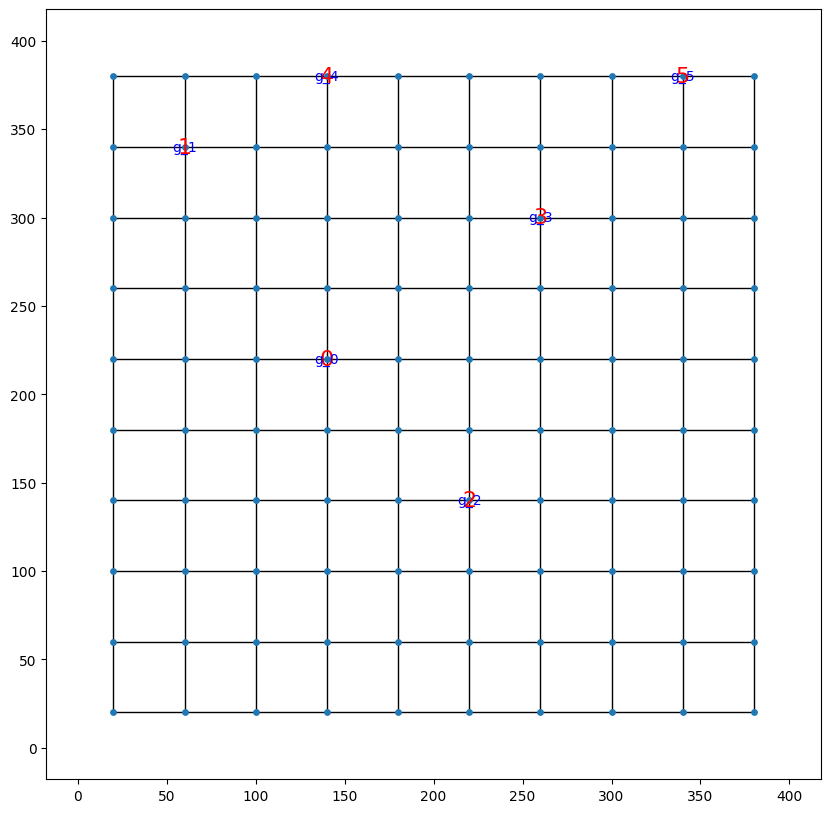

In [42]:
# load paths
print(vertices)
paths = []
max_length = 0
with open(path_file, 'r') as f:
    lines = f.readlines()
    for l_id, l in enumerate(lines):
        l_data = l.strip("\n").split(" ")
        # print(l_data)
        max_length = max(max_length, len(l_data) - 1) # there is a '' at the end of array.
        path = []
        for i, v in enumerate(l_data):
            v_data = v.split(",")
            if(len(v_data)<3):
                continue
            x = float(v_data[0])
            y = float(v_data[1])
            z = float(v_data[2])
            print(x,y,z)

            path.append(vertices[(x,y)])
        paths.append(path)

# print(paths)

# Plot the map and the movements.

img_folder_path = "./images/"
if not os.path.exists(img_folder_path):
    os.makedirs(img_folder_path)
else:
    for pictures in glob("./images/*.png"):
        os.remove(pictures)

for t in range(0,max_length):
    labels = {}
    start_labels = {}
    goal_labels = {}
    agent_locs = []
    for p in paths:
        if(t>len(p)-1):
            agent_locs.append(p[-1])
        else:
            agent_locs.append(p[t])

    G = nx.Graph()

    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1])

    for node in G.nodes():
        for i_l, loc in enumerate(agent_locs):
            if node == loc:
                labels[node] = i_l
                break
        for i_l, loc in enumerate(agent_starts):
            if node == loc:
                start_labels[node] = "s_"+str(i_l)
                break;
        for i_l, loc in enumerate(agent_goals):
            if node == loc:
                goal_labels[node] = "g_"+str(i_l)
                break;

    fig, ax = plt.subplots(figsize=(10,10))


    nx.draw(G, pos=plot_pos,node_size=15, ax=ax)
    nx.draw_networkx_labels(G,plot_pos,labels,font_size=16,font_color='r')
    # nx.draw_networkx_labels(G,plot_pos,start_labels,font_size=16,font_color='b')
    nx.draw_networkx_labels(G,plot_pos,goal_labels,font_size=10,font_color='b')


    limits=plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


    plt.savefig(img_folder_path+str(t)+".png")

# Generate a gif to display the movements

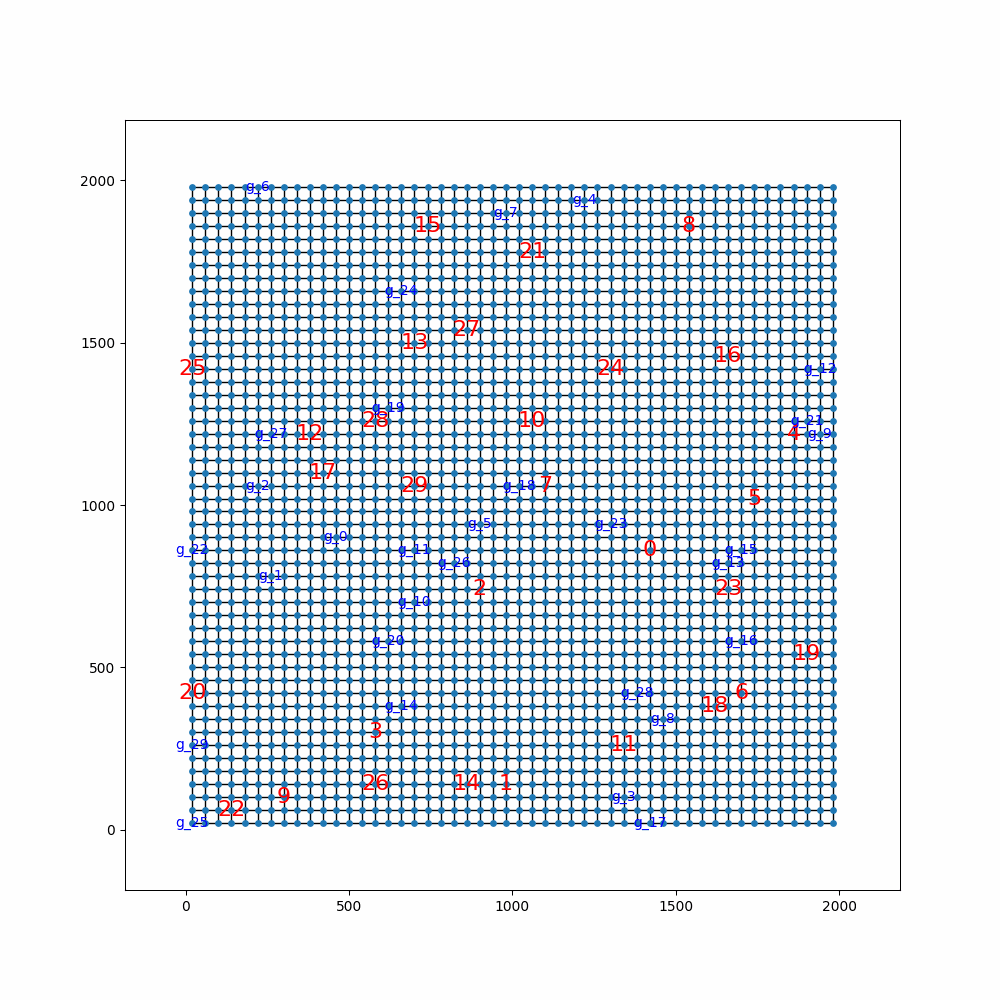

In [15]:
from PIL import Image
import os
from IPython.display import Image as im2
import glob

frames = [Image.open(image) for image in sorted(glob.glob('./images/*.png'), key=os.path.getmtime)]
frame_one = frames[0]
frame_one.save("movement.gif", format="GIF", append_images=frames,
            save_all=True, duration=100, loop=0)
im2(open('movement.gif','rb').read())

# Interactive display of the movement
Move the slider to control the display

In [ ]:
import ipywidgets as wg
import glob
from IPython.display import Image

def f(x):
    return Image(filename='./images/'+str(x)+'.png')

max_frame = 0
for img in glob.glob('./images/*.png'):
    id = img.split(".png")[-2].split("/images/")[-1]
    if int(id)>max_frame:
        max_frame = int(id)

wg.interact(f, x=wg.IntSlider(min=0,max=max_frame,step=1));

interactive(children=(IntSlider(value=0, description='x', max=25), Output()), _dom_classes=('widget-interact',…

In [ ]:
!zip -r ./toio_map_examples/test.zip ./toio_map_examples/

  adding: toio_map_examples/ (stored 0%)
  adding: toio_map_examples/grid_agent_shape_example_1000_1000_625_20_0.txt (deflated 47%)
  adding: toio_map_examples/grid_map_1000_1000_625.txt (deflated 64%)
  adding: toio_map_examples/grid_agent_1000_1000_625_20_0.txt (deflated 44%)
  adding: toio_map_examples/example_paths.txt (deflated 83%)


# probablistic roadmap generation


{0: (860, 791), 1: (520, 318), 2: (466, 143), 3: (863, 693), 4: (98, 596), 5: (842, 237), 6: (813, 868), 7: (241, 675), 8: (371, 484), 9: (187, 122), 10: (287, 881), 11: (506, 583), 12: (486, 381), 13: (409, 216), 14: (418, 65), 15: (139, 811), 16: (112, 926), 17: (535, 232), 18: (563, 53), 19: (664, 210), 20: (95, 385), 21: (697, 828), 22: (2, 661), 23: (714, 67), 24: (516, 751), 25: (601, 653), 26: (656, 563), 27: (728, 106), 28: (5, 534), 29: (706, 147), 30: (344, 109), 31: (829, 170), 32: (490, 420), 33: (700, 922), 34: (301, 844), 35: (898, 65), 36: (259, 483), 37: (641, 556), 38: (551, 956), 39: (898, 876), 40: (354, 379), 41: (695, 305), 42: (591, 765), 43: (565, 587), 44: (156, 901), 45: (185, 59), 46: (435, 996), 47: (335, 18), 48: (834, 310), 49: (846, 839), 50: (62, 757), 51: (338, 42), 52: (241, 486), 53: (869, 927), 54: (75, 193), 55: (77, 706), 56: (158, 326), 57: (876, 191), 58: (227, 595), 59: (739, 574), 60: (486, 495), 61: (319, 907), 62: (532, 689), 63: (120, 351), 6

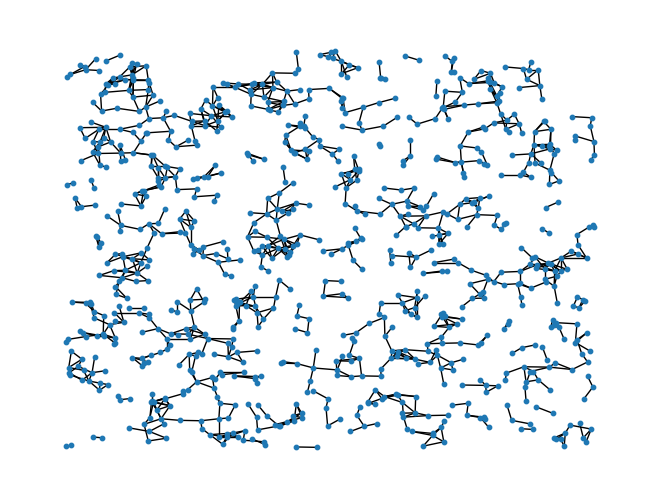

In [ ]:
num_v = 1000
x_space = 1000
y_space = 1000
neighbor_dist = 50
edge_prob = 0.5

vertices = []
neighbor_list = [[] for i in range(0,num_v)]
edges = []

def simple_dist(v,v2):
    return abs(v[0]-v2[0]) + abs(v[1] - v2[1])

for i in range(0, num_v):
    x = np.random.randint(x_space)
    y = np.random.randint(y_space)
    # print(x,y)
    vertices.append((x,y))

for v_i in range(0,num_v):
    for v2_i in range(v_i+1, num_v):
        v = vertices[v_i]
        v2 = vertices[v2_i]
        if(simple_dist(v,v2)<=neighbor_dist):
            if(np.random.uniform(0,1)<=edge_prob):
                neighbor_list[v_i].append(v2)
                edges.append((v_i,v2_i))
            # print(v,v2,simple_dist(v,v2))

# plot graph for visulization
G = nx.Graph()

for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1])

pos = {i: p for i,p in enumerate(vertices)}
print(pos)
nx.draw(G, pos=pos,node_size=10)
